<a href="https://colab.research.google.com/github/AyaElshazly/Applied-Machine-Learning/blob/main/Group4_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!sudo pip3 install keras

In [ ]:
pip install minisom

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
from sklearn.decomposition import PCA
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_classif, VarianceThreshold
from sklearn.feature_selection import RFE, f_classif, SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from minisom import MiniSom
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline

In [ ]:
# Load the MCS dataset
data = pd.read_csv('/content/MCSDatasetNEXTCONLab.csv')

In [ ]:
#1(a)

# Split the dataset into training and test datasets based on the day feature
train_data = data[data['Day'].isin([0, 1, 2])]
test_data = data[data['Day'] == 3]

# Separate the features and target variable for training and test datasets
train_features = train_data.drop(['ID', 'Day', 'Ligitimacy'], axis=1)
train_target = train_data['Ligitimacy']
test_features = test_data.drop(['ID', 'Day', 'Ligitimacy'], axis=1)
test_target = test_data['Ligitimacy']

# Split the remaining parts of the dataset into training and test datasets based on the day feature
remaining_data = data[data['Day'].isin([4, 5, 6, 7])]
remaining_train_data, remaining_test_data = train_test_split(remaining_data, test_size=0.2, random_state=0)

# Separate the features and target variable for remaining training and test datasets
remaining_train_features = remaining_train_data.drop(['ID', 'Day', 'Ligitimacy'], axis=1)
remaining_train_target = remaining_train_data['Ligitimacy']
remaining_test_features = remaining_test_data.drop(['ID', 'Day', 'Ligitimacy'], axis=1)
remaining_test_target = remaining_test_data['Ligitimacy']

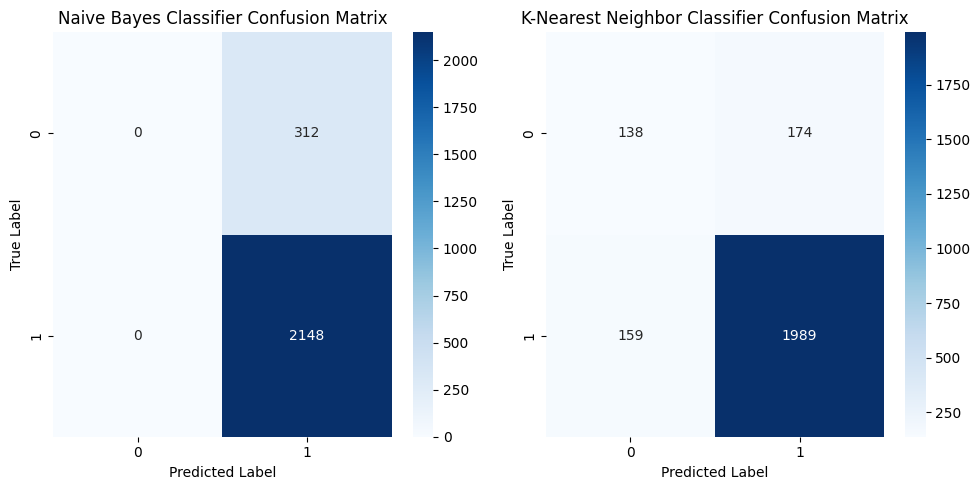

Naive Bayes Classifier F1 Score: 0.9322916666666667
K-Nearest Neighbor Classifier F1 Score: 0.9227557411273487


In [ ]:
#1(b)
# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(train_features, train_target)

# Train the K-Nearest Neighbor classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(train_features, train_target)

# Make predictions on the test dataset using both classifiers
nb_predictions = nb_classifier.predict(test_features)
knn_predictions = knn_classifier.predict(test_features)

# Calculate the accuracy
nb_accuracy = accuracy_score(test_target, nb_predictions)
knn_accuracy = accuracy_score(test_target, knn_predictions)

# Calculate the confusion matrices and F1 scores for both classifiers
nb_confusion_matrix = confusion_matrix(test_target, nb_predictions)
knn_confusion_matrix = confusion_matrix(test_target, knn_predictions)
nb_f1_score = f1_score(test_target, nb_predictions)
knn_f1_score = f1_score(test_target, knn_predictions)

# Plot the confusion matrices for both classifiers
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(nb_confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Naive Bayes Classifier Confusion Matrix')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
sns.heatmap(knn_confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('K-Nearest Neighbor Classifier Confusion Matrix')
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')
plt.tight_layout()
plt.show()

# Print the confusion matrices and F1 scores

print('Naive Bayes Classifier F1 Score:', nb_f1_score)

print('K-Nearest Neighbor Classifier F1 Score:', knn_f1_score)

<ipython-input-8-b31f33d0c077>:9: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=train_tsne[:,0], y=train_tsne[:,1], hue=train_target, palette='bright', style=train_target, markers=['o', 's', 'D'])


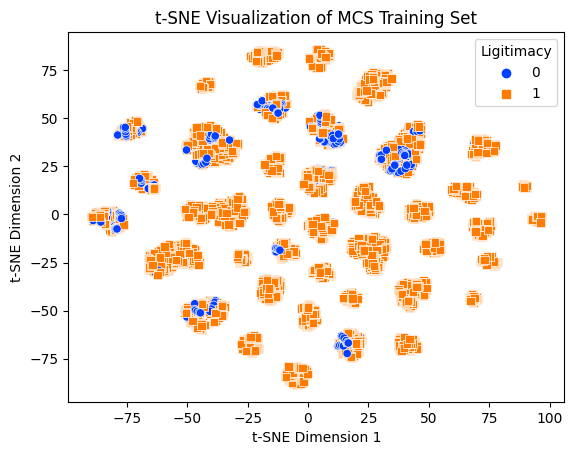

<ipython-input-8-b31f33d0c077>:19: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=test_tsne[:,0], y=test_tsne[:,1], hue=test_target, palette='bright', style=test_target, markers=['o', 's', 'D'])


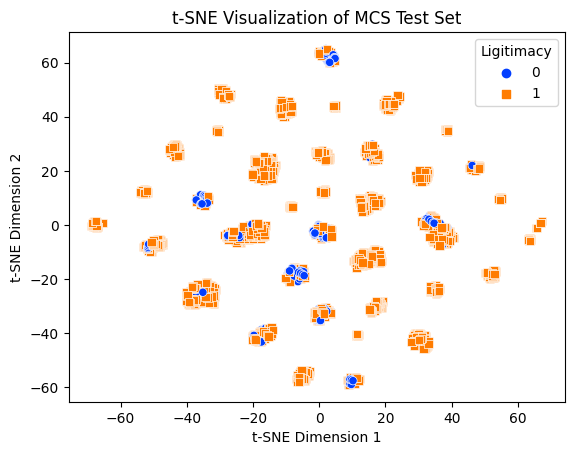

In [ ]:
#1(c)
# Generate 2D t-SNE plots for the training and test sets
tsne = TSNE(n_components=2, random_state=0)

# Fit t-SNE to the training set
train_tsne = tsne.fit_transform(train_features)

# Plot the t-SNE visualization of the training set
sns.scatterplot(x=train_tsne[:,0], y=train_tsne[:,1], hue=train_target, palette='bright', style=train_target, markers=['o', 's', 'D'])
plt.title('t-SNE Visualization of MCS Training Set')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

# Fit t-SNE to the test set
test_tsne = tsne.fit_transform(test_features)

# Plot the t-SNE visualization of the test set
sns.scatterplot(x=test_tsne[:,0], y=test_tsne[:,1], hue=test_target, palette='bright', style=test_target, markers=['o', 's', 'D'])
plt.title('t-SNE Visualization of MCS Test Set')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

## **2) Apply the following Dimensionality Reduction (DR) methods:PCA and Auto Encoder (AE)**

## **A-1) Find the best value of n-components in PCA**

In [ ]:
# Applying PCA
pca_values_nb = []
pca_values_knn = []
ranges = range(1, train_features.shape[1] + 1)

max_nb_f1 = 0
max_knn_f1 = 0
best_nb_n_components = 0
best_knn_n_components = 0

for n_components in ranges:
    pca = PCA(n_components=n_components, random_state=0)
    pca_scaler = Pipeline([
        ('scaler', MinMaxScaler()),
        ('pca', pca),
    ])
    pca_scaler.fit(train_features)
    train_features_pca = pca_scaler.transform(train_features)
    test_features_pca = pca_scaler.transform(test_features)

    nb_pca = GaussianNB()
    knn_pca = KNeighborsClassifier()

    nb_pca.fit(train_features_pca, train_target)
    knn_pca.fit(train_features_pca, train_target)

    nb_f1 = f1_score(test_target, nb_pca.predict(test_features_pca))
    knn_f1 = f1_score(test_target, knn_pca.predict(test_features_pca))

    pca_values_nb.append(nb_f1)
    pca_values_knn.append(knn_f1)

    if nb_f1 > max_nb_f1:
        max_nb_f1 = nb_f1
        best_nb_n_components = n_components

    if knn_f1 > max_knn_f1:
        max_knn_f1 = knn_f1
        best_knn_n_components = n_components

print("Best value of n_components for Naive Bayes:", best_nb_n_components)
print("Best value of n_components for K-Nearest Neighbors:", best_knn_n_components)


Best value of n_components for Naive Bayes: 1
Best value of n_components for K-Nearest Neighbors: 3


## **Applying PCA when n-components=1 for Naive Bayes and n-components=3 for K-Nearest Neighbors**

In [ ]:
# Applying PCA

# for n_components=1:
pca_nb = PCA(n_components=1, random_state=0)
pca_knn = PCA(n_components=3, random_state=0)
pca_scaler_nb = Pipeline([
        ('scaler', MinMaxScaler()),
        ('pca', pca_nb),
    ])
pca_scaler_knn = Pipeline([
        ('scaler', MinMaxScaler()),
        ('pca', pca_knn),
    ])
pca_scaler_nb.fit(train_features)
pca_scaler_knn.fit(train_features)

train_features_pca_nb = pca_scaler_nb.transform(train_features)
test_features_pca_nb = pca_scaler_nb.transform(test_features)

train_features_pca_knn = pca_scaler_knn.transform(train_features)
test_features_pca_knn = pca_scaler_knn.transform(test_features)

nb_pca = GaussianNB()
knn_pca = KNeighborsClassifier()

nb_pca.fit(train_features_pca_nb, train_target)
knn_pca.fit(train_features_pca_knn, train_target)

nb_pca_pred = nb_pca.predict(test_features_pca_nb)
knn_pca_pred = knn_pca.predict(test_features_pca_knn)

pca_nb = f1_score(test_target, nb_pca_pred)
print("F1 score for Naive Bayes with n-components=1 is ", pca_nb)
pca_knn = f1_score(test_target, knn_pca_pred)
print("F1 score for K-Nearest Neighbors with n-components=3 is ", pca_knn)

F1 score for Naive Bayes with n-components=1 is  0.9322916666666667
F1 score for K-Nearest Neighbors with n-components=3 is  0.9297396913153652


## **A-2) Find the best value of hidden layer size of Autoencoder**

In [ ]:
# Applying Autoencoder (AE)
ae_scores_nb = []
ae_scores_knn = []
hidden_layer_sizes_range = range(1, train_features.shape[1] + 1)

scaler = MinMaxScaler()
train_features_scaled = scaler.fit_transform(train_features)

max_nb_f1 = 0
max_knn_f1 = 0
best_nb_hidden_layer_sizes = 0
best_knn_hidden_layer_sizes = 0

for hidden_layer_sizes in hidden_layer_sizes_range:
    autoencoder = MLPRegressor(hidden_layer_sizes=(hidden_layer_sizes,), activation='relu', solver='adam', random_state=0)

    autoencoder.fit(train_features_scaled, train_features_scaled)

    train_features_encoded = autoencoder.predict(train_features_scaled)
    test_features_encoded = autoencoder.predict(scaler.transform(test_features))

    nb_ae = GaussianNB()
    knn_ae = KNeighborsClassifier()

    nb_ae.fit(train_features_encoded, train_target)
    knn_ae.fit(train_features_encoded, train_target)

    nb_f1 = f1_score(test_target, nb_ae.predict(test_features_encoded))
    knn_f1 = f1_score(test_target, knn_ae.predict(test_features_encoded))

    ae_scores_nb.append(nb_f1)
    ae_scores_knn.append(knn_f1)

    if nb_f1 > max_nb_f1:
        max_nb_f1 = nb_f1
        best_nb_hidden_layer_sizes = hidden_layer_sizes

    if knn_f1 > max_knn_f1:
        max_knn_f1 = knn_f1
        best_knn_hidden_layer_sizes = hidden_layer_sizes

print("Best value of hidden_layer_sizes for Naive Bayes (AE):", best_nb_hidden_layer_sizes)
print("Best value of hidden_layer_sizes for K-Nearest Neighbors (AE):", best_knn_hidden_layer_sizes, '\n')
print(ae_scores_nb)
print(ae_scores_knn)

Best value of hidden_layer_sizes for Naive Bayes (AE): 9
Best value of hidden_layer_sizes for K-Nearest Neighbors (AE): 8 

[0.8679338434954333, 0.8040201005025125, 0.8462311557788944, 0.8060413354531001, 0.8895320791123975, 0.8944457802356336, 0.8962219033955044, 0.8972586412395709, 0.9034400948991697, 0.8985714285714286]
[0.9216962082118016, 0.9215077605321508, 0.9148550724637681, 0.9185185185185186, 0.920172845121674, 0.9193511537582819, 0.9200913242009132, 0.9273182957393483, 0.9146005509641874, 0.9183626800823234]


## **Applying Autoencoder (AE) when hidden layer size for nb is = 9 and for knn = 8**

In [ ]:
# Applying Autoencoder (AE) when hidden layer size for nb is 9 and for knn = 8

autoencoder_nb = MLPRegressor(hidden_layer_sizes=(9,), activation='relu', solver='adam', random_state=0)
autoencoder_knn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', random_state=0)

autoencoder_nb.fit(train_features_scaled, train_features_scaled)
autoencoder_knn.fit(train_features_scaled, train_features_scaled)

train_features_encoded_nb = autoencoder_nb.predict(train_features_scaled)
test_features_encoded_nb = autoencoder_nb.predict(scaler.transform(test_features))

train_features_encoded_knn = autoencoder_nb.predict(train_features_scaled)
test_features_encoded_knn = autoencoder_nb.predict(scaler.transform(test_features))

nb_ae = GaussianNB()
knn_ae = KNeighborsClassifier()

nb_ae.fit(train_features_encoded_nb, train_target)
knn_ae.fit(train_features_encoded_knn, train_target)

ae_score_nb = f1_score(test_target, nb_ae.predict(test_features_encoded_nb))
print("F1 score for Naive Bayes with hidden layer size=9 is ", ae_score_nb)

ae_score_knn = f1_score(test_target, knn_ae.predict(test_features_encoded_knn))
print("F1 score for K-Nearest Neighbors with hidden layer size=8 is ", ae_scores_knn[7])

F1 score for Naive Bayes with hidden layer size=9 is  0.9034400948991697
F1 score for K-Nearest Neighbors with hidden layer size=8 is  0.9273182957393483


## **Plotting the results**

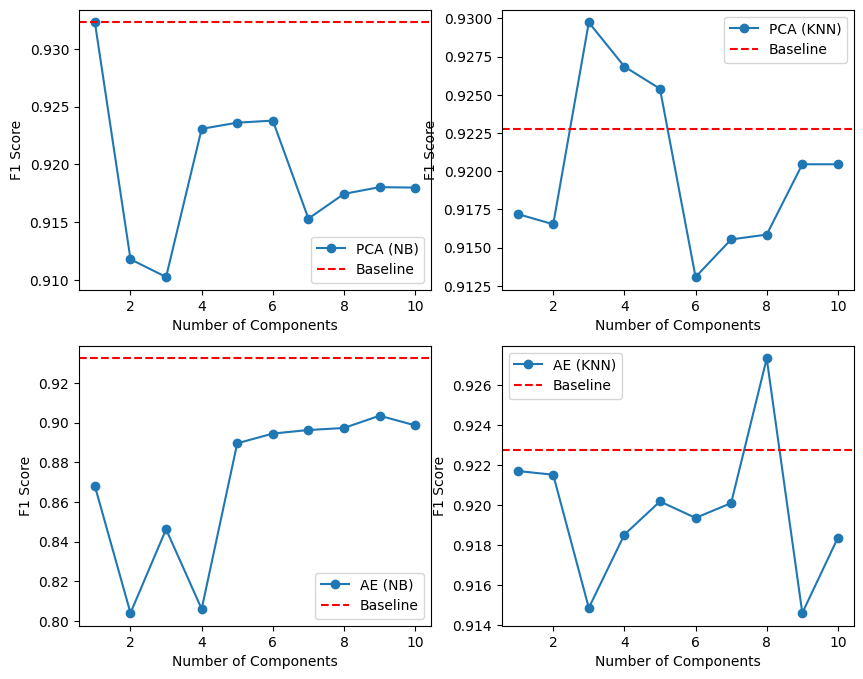

In [ ]:
# Plotting the results

plt.figure(figsize=(10, 8))

# PCA plots
plt.subplot(2, 2, 1)
plt.plot(ranges, pca_values_nb, label='PCA (NB)', marker='o')
plt.axhline(y=nb_f1_score, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(ranges, pca_values_knn, label='PCA (KNN)', marker='o')
plt.axhline(y=knn_f1_score, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()

# Autoencoder plots
plt.subplot(2, 2, 3)
plt.plot(ranges, ae_scores_nb, label='AE (NB)', marker='o')
plt.axhline(y=nb_f1_score, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(ranges, ae_scores_knn, label='AE (KNN)', marker='o')
plt.axhline(y=knn_f1_score, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()

## **Based on the previous graphs "PCA" results the best performance especially with "NB classifier"**

## **B) plotting 2D TSNE based on the best performance for both training set and test set**

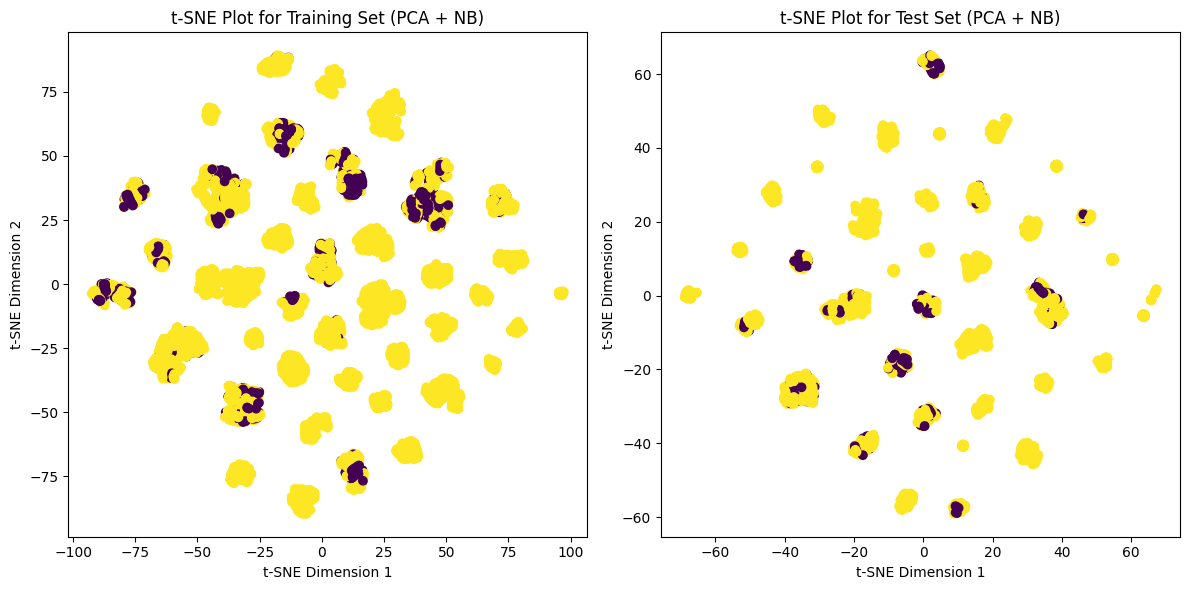

In [ ]:
pca = PCA(n_components=10, random_state=0)
X_train_pca = pca.fit_transform(train_features)
X_test_pca = pca.transform(test_features)

# Train NB classifier on PCA-transformed data
nb = KNeighborsClassifier()
nb.fit(X_train_pca, train_target)

# Apply TSNE
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train_pca)
X_test_tsne = tsne.fit_transform(X_test_pca)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_target, cmap='viridis')
plt.title('t-SNE Plot for Training Set (PCA + NB)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(1, 2, 2)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_target, cmap='viridis')
plt.title('t-SNE Plot for Test Set (PCA + NB)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()

# **3-**

## **A) Find the best number of features when applying filter methods with Information Gain**

In [ ]:
# Applying filter methods
num_features_range = range(1, train_features.shape[1] + 1)

# Information Gain
ig_scores_nb = []
ig_scores_knn = []

max_nb_f1 = 0
max_knn_f1 = 0
best_nb_num_features = 0
best_knn_num_features = 0

for k in num_features_range:
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    train_features_selected_ig = selector.fit_transform(train_features, train_target)
    test_features_selected_ig = selector.transform(test_features)

    nb_selected = GaussianNB()
    knn_selected = KNeighborsClassifier()

    nb_selected.fit(train_features_selected_ig, train_target)
    knn_selected.fit(train_features_selected_ig, train_target)

    nb_f1 = f1_score(test_target, nb_selected.predict(test_features_selected_ig))
    knn_f1 = f1_score(test_target, knn_selected.predict(test_features_selected_ig))

    ig_scores_nb.append(nb_f1)
    ig_scores_knn.append(knn_f1)

    if nb_f1 > max_nb_f1:
        max_nb_f1 = nb_f1
        best_nb_num_features = k

    if knn_f1 > max_knn_f1:
        max_knn_f1 = knn_f1
        best_knn_num_features = k

print("Best value of num_features_range for Naive Bayes (IG):", best_nb_num_features)
print("Best value of num_features_range for K-Nearest Neighbors (IG):", best_knn_num_features, '\n')
print(ig_scores_nb)
print(ig_scores_knn)




Best value of num_features_range for Naive Bayes (IG): 1
Best value of num_features_range for K-Nearest Neighbors (IG): 2 

[0.9322916666666667, 0.9322916666666667, 0.9322916666666667, 0.9322916666666667, 0.9322916666666667, 0.9322916666666667, 0.9322916666666667, 0.9322916666666667, 0.9322916666666667, 0.9322916666666667]
[0.9764513872697598, 0.9833684703677676, 0.9824232481837357, 0.9804751823100447, 0.9749882019820669, 0.9757132751709503, 0.9328891004283675, 0.9266903914590747, 0.9360112097150864, 0.9227557411273487]


## **Applying filter method with Information Gain with number of features=1 for nb and features=2 for KNN**

In [ ]:
# Filter Methods (Information Gain)
num_features_nb = 1
num_features_knn = 2

# SelectKBest with Information Gain for NB
selector_nb = SelectKBest(score_func=mutual_info_classif, k=num_features_nb)
train_features_selected_nb = selector_nb.fit_transform(train_features, train_target)
test_features_selected_nb = selector_nb.transform(test_features)

# SelectKBest with Information Gain for KNN
selector_knn = SelectKBest(score_func=mutual_info_classif, k=num_features_knn)
train_features_selected_knn = selector_knn.fit_transform(train_features, train_target)
test_features_selected_knn = selector_knn.transform(test_features)

# Naive Bayes with selected features
nb_selected = GaussianNB()
nb_selected.fit(train_features_selected_nb, train_target)
nb_f1 = f1_score(test_target, nb_selected.predict(test_features_selected_nb))
print("F1 score for Naive Bayes with", num_features_nb, "selected feature(s):", nb_f1)

# K-Nearest Neighbors with selected features
knn_selected = KNeighborsClassifier()
knn_selected.fit(train_features_selected_knn, train_target)
knn_f1 = f1_score(test_target, knn_selected.predict(test_features_selected_knn))
print("F1 score for K-Nearest Neighbors with", num_features_knn, "selected feature(s):", knn_f1)

F1 score for Naive Bayes with 1 selected feature(s): 0.9322916666666667
F1 score for K-Nearest Neighbors with 2 selected feature(s): 0.9833684703677676


## **Plotting the results**

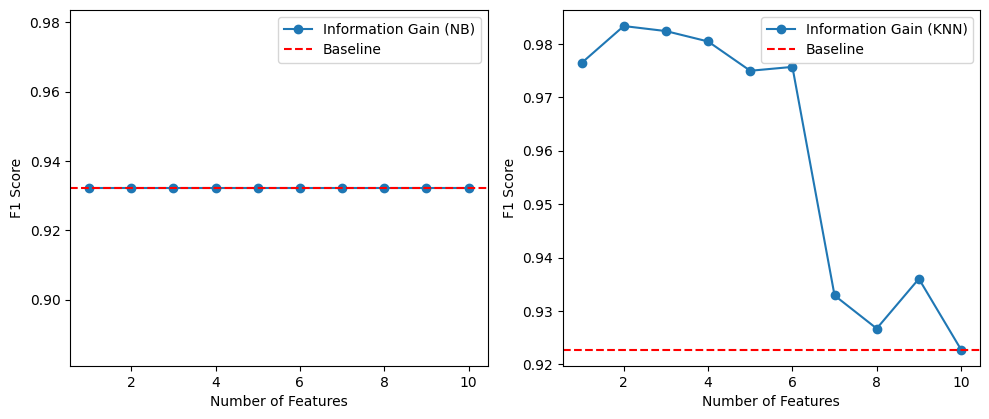

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 8))

# Information Gain
plt.subplot(2, 2, 1)
plt.plot(num_features_range, ig_scores_nb, label='Information Gain (NB)', marker='o')
plt.axhline(y=nb_f1_score, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(num_features_range, ig_scores_knn, label='Information Gain (KNN)', marker='o')
plt.axhline(y=knn_f1_score, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

## **B) Find the best number of features when applying Wrapper Methods with Forward Feature Elimination**

In [ ]:
# Applying wrapper methods
features_range = range(1, train_features.shape[1] + 1)

# Forward Feature Elimination
ffe_acc_nb = []
ffe_acc_knn = []

max_nb_acc = 0
max_knn_acc = 0
best_nb_features = 0
best_knn_features = 0

for k in features_range:
    selector = SelectKBest(score_func=f_classif, k=k)
    train_features_selected_ffe = selector.fit_transform(train_features, train_target)
    test_features_selected_ffe = selector.transform(test_features)

    nb_selected = GaussianNB()
    knn_selected = KNeighborsClassifier()

    nb_selected.fit(train_features_selected_ffe, train_target)
    knn_selected.fit(train_features_selected_ffe, train_target)

    nb_acc = accuracy_score(test_target, nb_selected.predict(test_features_selected_ffe))
    knn_acc = accuracy_score(test_target, knn_selected.predict(test_features_selected_ffe))

    ffe_acc_nb.append(nb_acc)
    ffe_acc_knn.append(knn_acc)

    if nb_acc > max_nb_acc:
        max_nb_acc = nb_acc
        best_nb_features = k

    if knn_acc > max_knn_acc:
        max_knn_acc = knn_acc
        best_knn_features = k

print("Best value of features_range for Naive Bayes (FFE):", best_nb_features)
print("Best value of features_range for K-Nearest Neighbors (FFE):", best_knn_features)

Best value of features_range for Naive Bayes (FFE): 5
Best value of features_range for K-Nearest Neighbors (FFE): 6


## **Applying Wrapper Methods using Forward Feature Elimination with number of features=5 for nb and features=6 for KNN**

In [ ]:
# Wrapper Methods (Forward Feature Elimination)
num_features_nb = 5
num_features_knn = 6

# SelectKBest with f_classif for NB
selector_nb = SelectKBest(score_func=f_classif, k=num_features_nb)
train_features_selected_nb = selector_nb.fit_transform(train_features, train_target)
test_features_selected_nb = selector_nb.transform(test_features)

# SelectKBest with f_classif for KNN
selector_knn = SelectKBest(score_func=f_classif, k=num_features_knn)
train_features_selected_knn = selector_knn.fit_transform(train_features, train_target)
test_features_selected_knn = selector_knn.transform(test_features)

# Naive Bayes with selected features
nb_selected = GaussianNB()
nb_selected.fit(train_features_selected_nb, train_target)
nb_f1 = f1_score(test_target, nb_selected.predict(test_features_selected_nb))
print("F1 score for Naive Bayes with", num_features_nb, "selected feature(s):", nb_f1)

# K-Nearest Neighbors with selected features
knn_selected = KNeighborsClassifier()
knn_selected.fit(train_features_selected_knn, train_target)
knn_f1 = f1_score(test_target, knn_selected.predict(test_features_selected_knn))
print("F1 score for K-Nearest Neighbors with", num_features_knn, "selected feature(s):", knn_f1)


F1 score for Naive Bayes with 5 selected feature(s): 0.9322916666666667
F1 score for K-Nearest Neighbors with 6 selected feature(s): 0.9584214235377027


### **Plotting the results**

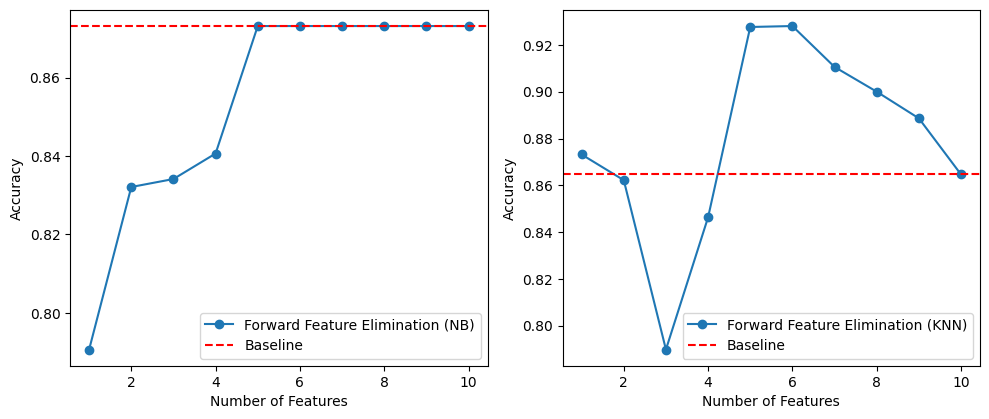

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 8))

# Forward Feature Elimination
plt.subplot(2, 2, 1)
plt.plot(features_range, ffe_acc_nb, label='Forward Feature Elimination (NB)', marker='o')
plt.axhline(y=nb_accuracy, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(features_range, ffe_acc_knn, label='Forward Feature Elimination (KNN)', marker='o')
plt.axhline(y=knn_accuracy, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

\\\## **Based on the previous graphs Applying filter methods results the best performance especially with "Information Gain"**

## **c) Plotting the t-SNE results**

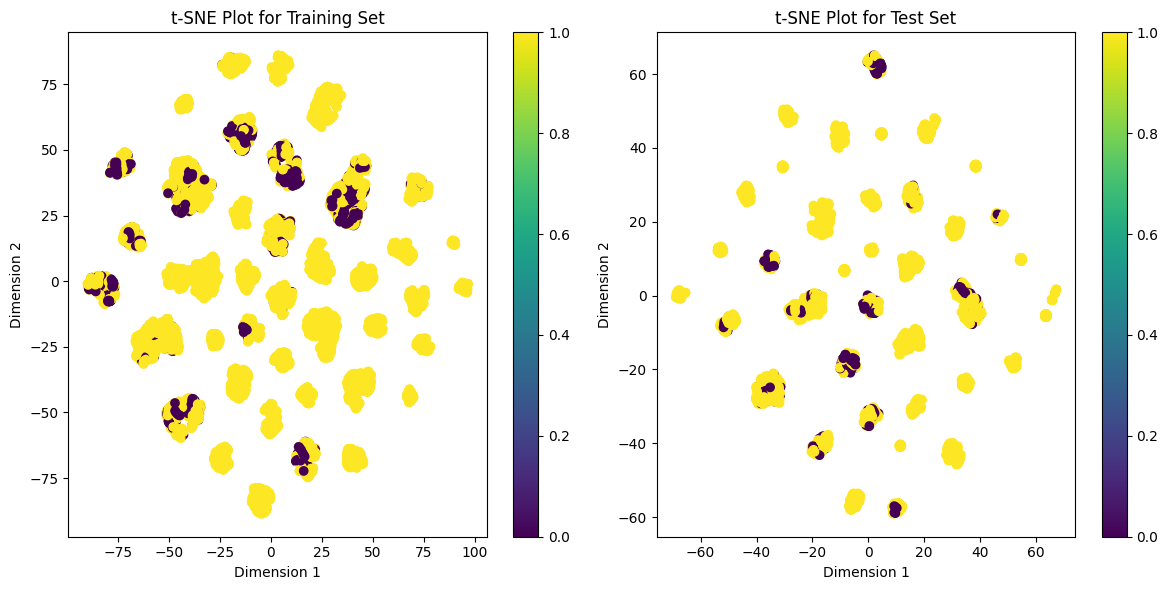

In [ ]:
# Plotting the t-SNE results
tsne = TSNE(n_components=2, random_state=0)

# Training Set
train_tsne = tsne.fit_transform(train_features)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(train_tsne[:, 0], train_tsne[:, 1], c=train_target, cmap='viridis')
plt.title('t-SNE Plot for Training Set')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()

# Test Set
test_tsne = tsne.fit_transform(test_features)

plt.subplot(1, 2, 2)
plt.scatter(test_tsne[:, 0], test_tsne[:, 1], c=test_target, cmap='viridis')
plt.title('t-SNE Plot for Test Set')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()

plt.tight_layout()
plt.show()

# **4-**

In [ ]:
# Select latitude and longitude features
X_train = train_data[['Latitude', 'Longitude']].values
X_test = test_data[['Latitude', 'Longitude']].values

# Set the number of cluster values to try
K_values = [8, 12, 16, 20, 32]

In [ ]:
def plot_result(k,result,l,title):
    # Plot the results
    plt.plot(k,result,marker='o',label=l)
    plt.xlabel('Number of clusters')
    plt.ylabel('Number of legitimate only members')
    plt.legend()
    plt.title(title)
    plt.show()

### (a) Apply K-means algorithm to plot the number of clusters (8,12,16,20 and 32) vs the total number of legitimate only members inside the legitimate onlyclusters.

In [ ]:
def cluster_kmeans(X, K_values,desired_data):
    legit_only_counts = []
    for K in K_values:
        kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=300, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        unique_labels = set(labels)
        legit_only_count = 0
        for label in unique_labels:
            cluster_indices = np.where(labels == label)[0]
            cluster_data = desired_data.iloc[cluster_indices]
            if np.all(cluster_data['Ligitimacy'] == 1):
                legit_only_count += len(cluster_data)
        legit_only_counts.append(legit_only_count)
    # Print the legitimate-only counts for each K value
    print(legit_only_counts)
    return legit_only_counts

[1573, 2679, 3420, 3965, 4740]


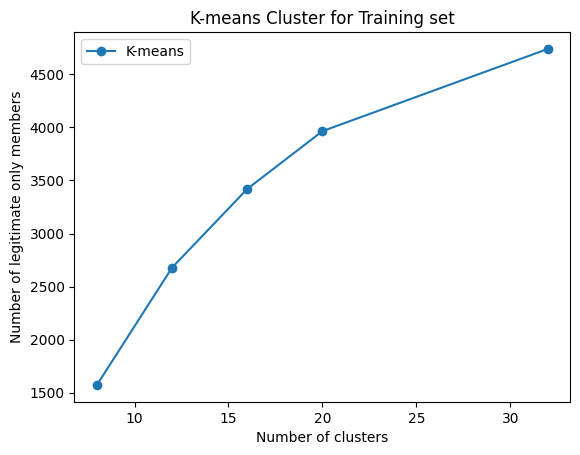

In [ ]:
# Run K-means algorithm for each K value on training set
legit_only_counts_kmeans_train = cluster_kmeans(X_train, K_values,train_data)
plot_result(K_values, legit_only_counts_kmeans_train,'K-means','K-means Cluster for Training set')

Based on the plot, the best number of clusters among 8, 12, 16, 20 and 32 clusters is 32, as it achieves the highest number of legitimate only members inside the legitimate only clusters.

The maximum number of legitimate only members in legitimate only clusters for 32 clusters is 4740.

[497, 978, 1179, 1376, 1713]


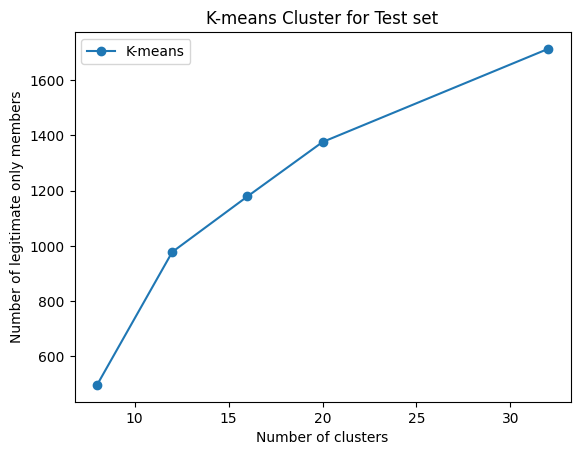

In [ ]:
# Run K-means algorithm for each K value on Test set
legit_only_counts_kmeans_test = cluster_kmeans(X_test, K_values,test_data)
plot_result(K_values, legit_only_counts_kmeans_test,'K-means','K-means Cluster for Test set')

Based on the plot, the best number of clusters among 8, 12, 16, 20 and 32 clusters is 32, as it achieves the highest number of legitimate only members inside the legitimate only clusters.
The maximum number of legitimate only members in legitimate only clusters for 32 clusters is 1713.

### (b) Apply SOFM algorithm to plot the number of clusters (8,12,16,20 and 32) vs the total number of legitimate only members inside the legitimate only clusters.

In [ ]:
def cluster_sofm(X, K_values,desired_data):
    legit_only_counts = []
    for K in K_values:
        som = MiniSom(x=K, y=K, input_len=2, sigma=1.0, learning_rate=0.5)
        som.random_weights_init(X)
        som.train_random(data=X, num_iteration=100)
        labels = np.zeros(len(desired_data))
        for i, x in enumerate(X):
            w = som.winner(x)
            labels[i] = w[0] * K + w[1]
        unique_labels = set(labels)
        legit_only_count = 0
        for label in unique_labels:
            cluster_indices = np.where(labels == label)[0]
            cluster_data = desired_data.iloc[cluster_indices]
            if np.all(cluster_data['Ligitimacy'] == 1):
                legit_only_count += len(cluster_data)
        legit_only_counts.append(legit_only_count)
    # Print the legitimate-only counts for each K value
    print(legit_only_counts)
    return legit_only_counts

[4401, 5527, 6009, 6070, 6179]


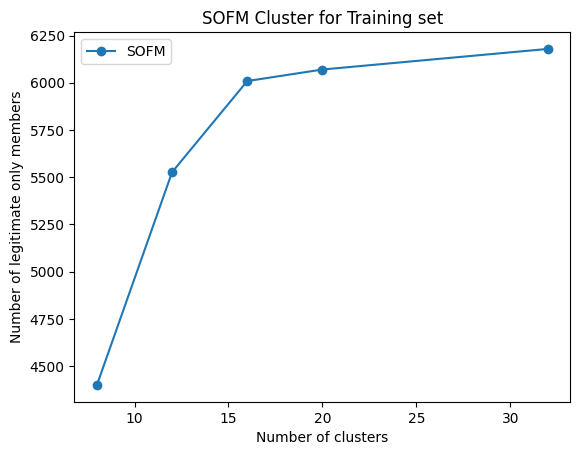

In [ ]:
# Run SOFM algorithm for each K value for Training Set
legit_only_counts_sofm_train = cluster_sofm(X_train, K_values,train_data)
plot_result(K_values, legit_only_counts_sofm_train,'SOFM','SOFM Cluster for Training set')

Based on the plot, the best number of clusters among 8, 12, 16, 20 and 32 clusters is 32, as it achieves the highest number of legitimate only members inside the legitimate only clusters.

The maximum number of legitimate only members in legitimate only clusters for 32 clusters is 6182.

[1697, 1946, 2019, 2083, 2134]


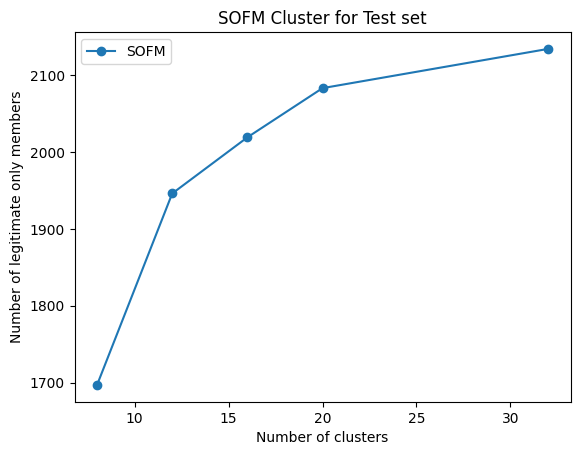

In [ ]:
# Run SOFM algorithm for each K value for Test Set
legit_only_counts_sofm_test = cluster_sofm(X_test, K_values,test_data)
plot_result(K_values, legit_only_counts_sofm_test,'SOFM','SOFM Cluster for Test set')

Based on the plot, the best number of clusters among 8, 12, 16, 20 and 32 clusters is 32, as it achieves the highest number of legitimate only members inside the legitimate only clusters.

The maximum number of legitimate only members in legitimate only clusters for 32 clusters is 2130.

### (c) Apply DBSCAN algorithm to plot the number of clusters (8,12,16,20 and 32) vs the total number of legitimate only members inside the legitimate only clusters. You need to try different midPoint and epsilon parameters to obtain the 5 different cluster numbers. If you cannot obtain specific numbers you can report approximate numbers to 8,12,16,20 and 32

In [ ]:
# As asked in Announcements yesterday, fix one parameter, and change the other parameter
min_samples_value = 2
eps_values = np.linspace(0.001, 0.1, num=100)
n_clusters_list = [8, 12, 16, 20, 32]

In [ ]:
def cluster_dbscan(X, n_clusters_list, eps_values, min_samples_value, desired_data):
    legit_only_counts = []
    for n_clusters in n_clusters_list:
        max_legit_only_count = 0
        best_eps = None
        for eps in eps_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples_value)
            dbscan.fit(X)
            labels = dbscan.labels_
            n_clusters_found = len(set(labels)) - (1 if -1 in labels else 0)
            legit_only_count = 0
            for label in set(labels):
                if label != -1:
                    cluster_indices = np.where(labels == label)[0]
                    cluster_data = desired_data.iloc[cluster_indices]
                    if np.all(cluster_data['Ligitimacy'] == 1):
                        legit_only_count += len(cluster_data)
            if legit_only_count > max_legit_only_count and n_clusters_found == n_clusters:
                max_legit_only_count = legit_only_count
                best_eps = eps
        legit_only_counts.append(max_legit_only_count)
        print(f"Number of clusters: {n_clusters}")
        print(f"Best eps: {best_eps}")
        print(f"Maximum number of legitimate only members: {max_legit_only_count}")
        print()
    return legit_only_counts

Number of clusters: 8
Best eps: 0.010000000000000002
Maximum number of legitimate only members: 33

Number of clusters: 12
Best eps: None
Maximum number of legitimate only members: 0

Number of clusters: 16
Best eps: None
Maximum number of legitimate only members: 0

Number of clusters: 20
Best eps: None
Maximum number of legitimate only members: 0

Number of clusters: 32
Best eps: 0.007
Maximum number of legitimate only members: 178



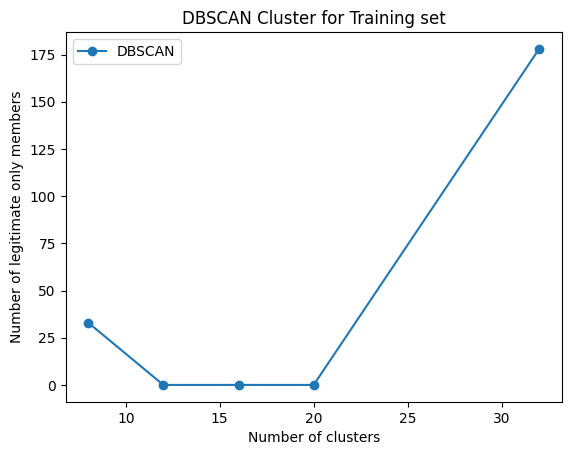

In [ ]:
# Run DBSCAN algorithm for each n_clusters value for Training set
legit_only_counts_dbscan_train = cluster_dbscan(X_train, n_clusters_list, eps_values, min_samples_value,train_data)
plot_result(n_clusters_list, legit_only_counts_dbscan_train,'DBSCAN','DBSCAN Cluster for Training set')

Based on the plot, the best number of clusters among 8, 12, 16, 20 and 32 clusters is 12, as it achieves the highest number of legitimate only members inside the legitimate only clusters.
The maximum number of legitimate only members in legitimate only clusters for 32 clusters is 178.


Number of clusters: 8
Best eps: 0.014000000000000002
Maximum number of legitimate only members: 36

Number of clusters: 12
Best eps: 0.013000000000000001
Maximum number of legitimate only members: 67

Number of clusters: 16
Best eps: None
Maximum number of legitimate only members: 0

Number of clusters: 20
Best eps: None
Maximum number of legitimate only members: 0

Number of clusters: 32
Best eps: None
Maximum number of legitimate only members: 0



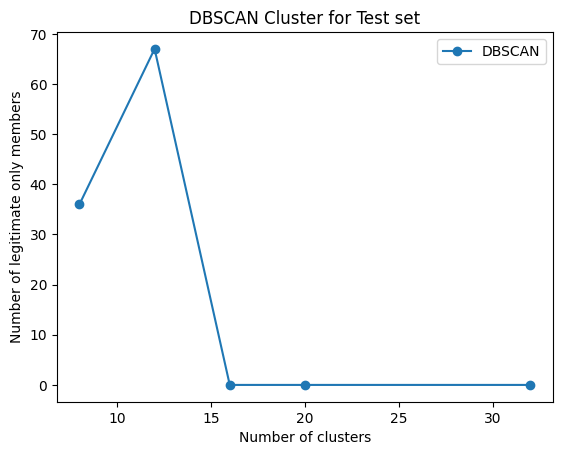

In [ ]:
# Run DBSCAN algorithm for each n_clusters value for Test set
legit_only_counts_dbscan_test = cluster_dbscan(X_test, n_clusters_list, eps_values, min_samples_value,test_data)
plot_result(n_clusters_list, legit_only_counts_dbscan_test,'DBSCAN','DBSCAN Cluster for Test set')

Based on the plot, the best number of clusters among 8, 12, 16, 20 and 32 clusters is 12, as it achieves the highest number of legitimate only members inside the legitimate only clusters.
The maximum number of legitimate only members in legitimate only clusters for 12 clusters is 67.


# 5) The conclusion part

#conclusion of Q.1



This code loads the MCS dataset, splits it into training and test datasets based on the "Day" feature, and then separates the features and target variable for the training and test datasets. It also splits the remaining parts of the dataset into training and test datasets based on the "Day" feature, using a random seed of 0.
It then trains a Naive Bayes classifier and a K-Nearest Neighbor classifier on the training data, and makes predictions on the test data using both classifiers. It also calculates the confusion matrices and F1 scores for both classifiers F1 scores of NB 0.93 is better than of KNN 0.92 and plots the confusion matrices using `seaborn`'s heatmap function.
Finally, it generates 2D t-SNE plots for both the training and test sets using `sklearn.manifold`'s `TSNE` function and `seaborn`'s `scatterplot` function.

# Conclusion of Q.2:

We used both Naive Bayes Classifier (NB) and K-Nearest Neighbor (KNN) to find the best values of n-components that result the best F1 scores when applying two Dimensionality Reduction methods PCA and Auto Encoder (AE).

As mentioned in **(A-1) cell** for **PCA** after we used both classifiers (NB, KNN) we found out that **the best value of n_components for NB is equal 1 and for KNN is equal 3**.
then we took these values of n-components to get the highest F1 scores of test
dataset and we got the following:

**For Naive Bayes the best value of F1 score when n-components=1 is  0.9322916666666667**

**For K-Nearest Neighbors F1 score when n-components=3 is 0.9297396913153652**

Then we plotting the results against the baseline performance and found out that we got the highest performance when using PCA+NB than PCA+KNN

****

And as mentioned in **(A-2) cell** for **Autoencoder (AE)**, after we applied both Naive Bayes Classifier (NB) and K-Nearest Neighbor (KNN) we found out that **for Naive Bayesthe the best value of hidden layer size is equal 9 and for K-Nearest Neighbors the Best value of hidden_layer_size is equal 8**
then we took these values of hidden_layer_sizes to get the highest F1 scores and we got the following results:

**For Naive Bayes the best value of F1 score when using hidden layer size = 9 is  0.9034400948991697**

**For K-Nearest Neighbors the best value of F1 score when using hidden layer size = 8 is  0.9273182957393483**

Then we plotting the results against the baseline performance and found out that we got the highest performance when using AE+NB and AE+KNN

finally we were plotting 2D TSNE based on the best performance(PCA+NB) for both training set and test set and observed that the data wasn't separated well

# Conclusion of Q.3:

For both Feature Selection methods We used Naive Bayes Classifier (NB) and K-Nearest Neighbor (KNN) to find the best numbers of features.
when applying **filter methods with Information Gain** we found out **that the best value of num_features_range for Naive Bayes is equal 1 and the best value of num_features_range for K-Nearest Neighbors is equal 2**. then we took these values of of features to get the highest F1 scores and we got the following results:

**For Naive Bayes the best value of F1 score with 1 selected feature is 0.9322916666666667**

**For K-Nearest Neighbors the best value of F1 score with 2 selected features is 0.9833684703677676**

Then we plotting the results against the baseline performance and found out that we got the highest performance when using filter Methods (Information Gain)

****

And when applying **Wrapper Methods with Forward Feature Elimination** we found out that **the best value of features_range for Naive Bayes is equal 5 and the best value of features_range for K-Nearest Neighbor is equal 6**. then we took these values of features to get the highest F1 scores and we got the following results:

**For Naive Bayes the best value of F1 score with 5 selected features is 0.9322916666666667**

**For K-Nearest Neighbors the best value of F1 score with 6 selected features is 0.9584214235377027**

Then we plotting the results against the baseline performance and found out that we got changeable performance when using Wrapper Methods (Forward Feature Elimination)

Finally we were plotting 2D TSNE based on the best performance for both training set and test set and observed that the data wasn't separated well


# *Conclusion of Q.4:*
**For both training and test datset, We used three clustering algorithms, K-means, Self-Organizing Feature Map (SOFM), and Density-Based Spatial Clustering of Applications with Noise (DBSCAN), to cluster the latitude and longitude features of a dataset and find the best number of clusters among 8, 12, 16, 20, and 32 clusters that maximizes the number of legitimate only members inside the legitimate only clusters.**

#### For K-means and SOFM algorithms, we tried different numbers of clusters and calculated the number of legitimate only members inside the legitimate only clusters for each number of clusters. Based on the plots, For training & test set, we found that the best number of clusters is 32 for both algorithms, which achieved the highest number of legitimate only members inside the legitimate only clusters.

#### For the DBSCAN algorithm, we tried different combinations of hyperparameters and calculated the number of legitimate only members inside the legitimate only clusters for each number of clusters. Based on the plot, we found that the best number of clusters is 12 for Training and 32 for Test set, which achieved the highest number of legitimate only members inside the legitimate only clusters.

#### ****To sum up, The results show that the K-means and SOFM algorithms perform best when 32 clusters are used in training & test set, while the DBSCAN algorithm performs best with 12 clusters in training and 32 in test set. The maximum number of legitimate only members in legitimate only clusters for 32 clusters is (4740 training, 1713 test set) for K-means, and (6182 training, 2130 test) for SOFM, while the maximum number of legitimate only members in legitimate only clusters for (32 clusters is 178 for training set), and (12 cluster is 67) for test set for DBSCAN.****